In [1]:
#Numerical Python
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn as sns

# Gamma function
from scipy.special import gamma

# To calculate statistics
from statistics import mode
from scipy.stats import norm
from scipy.stats import hmean, trim_mean, iqr, median_abs_deviation, skew, kurtosis
from scipy.stats.mstats import gmean, winsorize
from statsmodels.distributions import ECDF

In [2]:
ALPHA = 0.2

In [3]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
Dat = np.array([0.0, 0.8, 1.0, 1.2, 1.3, 1.3, 1.4, 1.8, 2.4, 4.6])

# Empirical cumulative distribution function (ECDF)

In [5]:
ecdf = ECDF(Dat)

(-0.05, 4.6499999999999995)

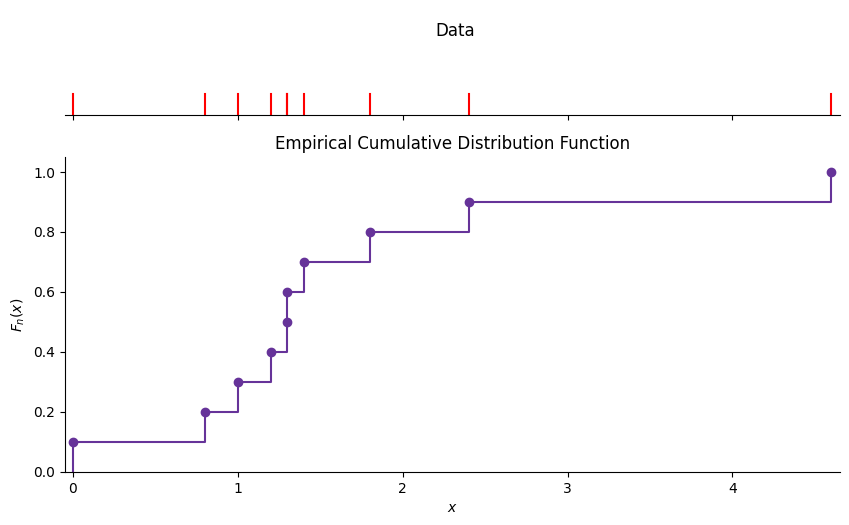

In [6]:
# Divide the figure in two subfigures
f, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True, height_ratios=[1, 3]) # The subfigures share the same x axis

# In the first subfigure we show our observations
ax[0].set_yticks([])                                        # Do not show the ticks in the vertical axis
ax[0].set_ylabel("")                                        # Do not show any label in the vertical axis
ax[0].spines[['left', 'right', 'top']].set_visible(False)   # Do not plot the left, right and top margins
ax[0].text(2.2, 0.75, "Data", fontsize=12)

for i in range(len(Dat)):
    ax[0].axvline(x=Dat[i], ymax=0.2, c='r')                # Plot the observations as a rugplot

# In the second subfigure we show the ECDF
ax[1].spines[['right', 'top']].set_visible(False)           # Do not plot the right and top margins

# Plot the ECDF
ax[1].scatter(ecdf.x, ecdf.y, color='rebeccapurple')        
ax[1].step(ecdf.x, ecdf.y, where='post', color='rebeccapurple')

# Add title and labels to the plot
ax[1].set_title("Empirical Cumulative Distribution Function", fontsize=12)
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$F_n(x)$')

# Modify the limits of the vertical and horizontal axes
ax[1].set_ylim(0, 1.05)
ax[1].set_xlim(Dat.min()-0.05, Dat.max()+0.05)

# Quantiles, quantiles, percentiles

In [7]:
# Quantiles of specific probabilities
p = [0.11, 1-np.exp(-1), 0.89]
np.quantile(Dat, p)

array([0.792    , 1.3689085, 2.422    ])

In [8]:
# Quartiles
p = [0.25, 0.5, 0.75]
np.quantile(Dat, p)

array([1.05, 1.3 , 1.7 ])

# Central tendency statistics

In [9]:
Mode = mode(Dat)
Median = np.median(Dat)
Mean = Dat.mean()
GeomMean = gmean(Dat)
HarmMean = hmean(Dat)

In [10]:
Weights = norm.pdf(Dat, Dat.mean(), Dat.std()) # Weights for the weighted mean

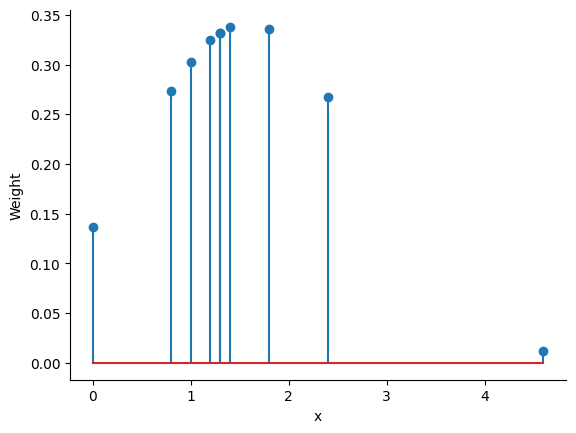

In [11]:
# Plot the weight for each observation
ax = plt.subplot(111)

ax.stem(Dat, Weights)
ax.set_xlabel('x')
ax.set_ylabel('Weight')

ax.spines[['right', 'top']].set_visible(False)

In [12]:
WeightedMean = np.average(Dat, weights=Weights)
TrimmedMean = trim_mean(Dat, 0.1)
InterquartileMean = trim_mean(Dat, 0.25)

In [13]:
DatWinsorized = winsorize(Dat, [0.1,0.1]) # Winsorized the data

DatWinsorized

masked_array(data=[0.8, 0.8, 1. , 1.2, 1.3, 1.3, 1.4, 1.8, 2.4, 2.4],
             mask=False,
       fill_value=1e+20)

In [14]:
WinsorizedMean = DatWinsorized.mean()

In [15]:
CentralTendency = [Mode, Median, Mean, GeomMean, HarmMean, WeightedMean, TrimmedMean, InterquartileMean, WinsorizedMean]

Text(1.75, 0.75, 'Central tendency statistics')

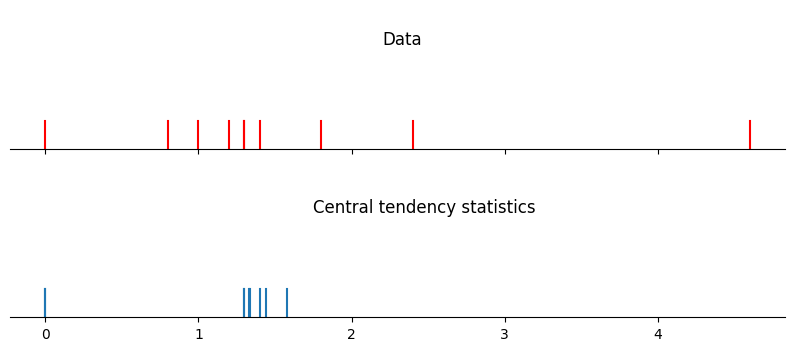

In [16]:
# Divide the figure in two subfigures
f, ax = plt.subplots(2, 1, figsize=(10,4), sharex=True)     # The subfigures share the same x axis

# In the first subfigure we show our observations
ax[0].set_yticks([])                                        # Do not show the ticks in the vertical axis
ax[0].set_ylabel("")                                        # Do not show any label in the vertical axis
ax[0].spines[['left', 'right', 'top']].set_visible(False)   # Do not plot the left, right and top margins
ax[0].text(2.2, 0.75, "Data", fontsize=12)

for i in range(len(Dat)):
    ax[0].axvline(x=Dat[i], ymax=0.2, c='r')                # Plot the observations as a rugplot

# In the second subfigure we show the central tendency statistics
ax[1].spines[['left', 'right', 'top']].set_visible(False)   # Do not plot the left, right and top margins

for i in range(len(CentralTendency)):
    ax[1].axvline(x=CentralTendency[i], ymax=0.2)

ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].text(1.75, 0.75, "Central tendency statistics", fontsize=12)

# DispersionStatistics

In [17]:
S2Biased = np.var(Dat)
S2Unbiased = np.var(Dat, ddof=1)

S1 = np.sqrt(S2Biased)
S2 = np.sqrt(S2Unbiased)
R = Dat.max() - Dat.min()
IQR = iqr(Dat)
MAD = median_abs_deviation(Dat)
AAD = abs(Dat-Dat.mean()).mean()

In [18]:
def an(n):
    return np.sqrt((n-1)/2) * gamma((n-1)/2) / gamma(n/2)

def c4(n):
    return 1/an(n)

# d2 for n in 2,...,25
d2 = {2:1.128, 3:1.693, 4:2.059, 5:2.326, 6:2.534, 7:2.704, 8:2.847, 9:2.970, 10:3.078, 11:3.173, 12:3.258, 13:3.336, 14:3.407, 15:3.472, 16:3.532, 17:3.588, 18:3.640, 19:3.689, 20:3.735, 21:3.778, 22:3.819, 23:3.858, 24:3.895, 25:3.931}

Calculate unbiased estimators for the standard deviation

In [19]:
N = len(Dat)

sigma_1 = S2 / c4(N)
sigma_2 = R / d2[N]
sigma_3 = IQR / (2 * norm.ppf(0.75))
sigma_4 = MAD / norm.ppf(0.75)
sigma_5 = AAD * np.sqrt(np.pi/2)

sigma_list = [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5]
labels = ['Deviation', 'Range', 'IQR', 'MAD', 'AAD']

If we decide to ignore the uncertainty of the estimators, and act as if they were the real mean and standard deviation of a normal distribution.

Then, a prediction interval of prob. $(1-\alpha)\times100\%$ would have limits corresponding with the quantiles of the normal distribution.

(-0.05, 0.5)

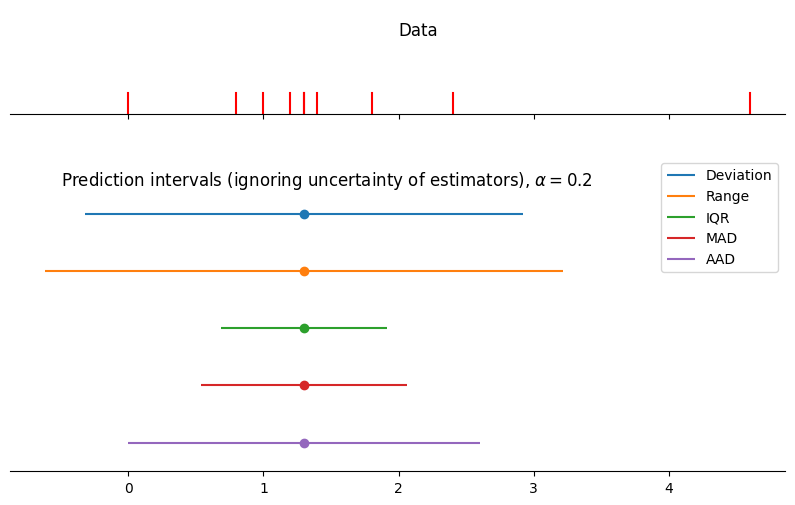

In [20]:
f, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True, height_ratios=[1, 3])

for i in range(len(Dat)):
    ax[0].axvline(x=Dat[i], ymax=0.2, c='r')

ax[0].set_yticks([])
ax[0].set_ylabel("")
ax[0].spines[['left', 'right', 'top']].set_visible(False)
ax[0].text(2, 0.75, "Data", fontsize=12)

for i, sigma in enumerate(sigma_list):
    ax[1].hlines(0.1*(4-i), norm.ppf(ALPHA/2, Median, sigma), norm.ppf(1-ALPHA/2, Median, sigma), color=colors[i], label=labels[i])
    ax[1].scatter(Median, 0.1*(4-i))

ax[1].legend()
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].spines[['left', 'right', 'top']].set_visible(False)
ax[1].text(-0.5, 0.45, r"Prediction intervals (ignoring uncertainty of estimators), $\alpha={}$".format(ALPHA), fontsize=12)
ax[1].set_ylim(-0.05, 0.5)

# Skewness

Empirical central moments and k-statistics

In [21]:
m2 = S2Biased
m3 = ((Dat-Mean)**3).mean()

k2 = S2Unbiased
k3 = N**2 / ((N-1)*(N-2))*m3

In [22]:
g1_byhand = m3 / m2**(3/2)
g1 = skew(Dat)

In [23]:
g1_byhand.round(4), g1.round(4)

(np.float64(1.472), np.float64(1.472))

In [24]:
G1_byhand = k3 / k2**(3/2)
G1 = skew(Dat, bias=False)

In [25]:
G1_byhand.round(4), G1.round(4)

(np.float64(1.7455), np.float64(1.7455))

<Axes: ylabel='Density'>

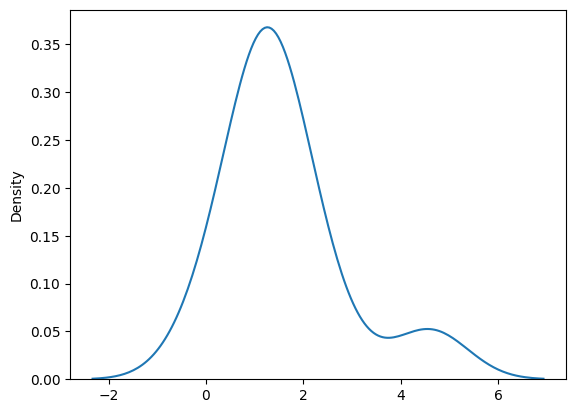

In [26]:
sns.kdeplot(Dat)

Deprecated measures of asymmetry

In [27]:
Sk1 = (Mean - Mode) / S2
Sk2 = (Mean - Median) / S2
S75 = (np.quantile(Dat, 0.75) + np.quantile(Dat, 0.25) - 2*np.median(Dat)) / IQR
S90 = (np.quantile(Dat, 0.9) + np.quantile(Dat, 0.1) - 2*np.median(Dat)) / (np.quantile(Dat, 0.9) - np.quantile(Dat, 0.1))

In [28]:
Sk1.round(4), Sk2.round(4), S75.round(4), S90.round(4)

(np.float64(0.2276),
 np.float64(0.2276),
 np.float64(0.2308),
 np.float64(0.3895))

# Kurtosis

In [29]:
m4 = ((Dat-Mean)**4).mean()

k4 = N**2*((N+1)*m4 - 3*(N-1)*m2**2) / ((N-1)*(N-2)*(N-3))

In [30]:
g2_byhand = m4/m2**2
g2 = kurtosis(Dat, fisher=False)

In [31]:
g2_byhand.round(4), g2.round(4)

(np.float64(4.8753), np.float64(4.8753))

In [32]:
G2_byhand = k4/k2**2 + 3
G2 = kurtosis(Dat, fisher=False, bias=False)

In [33]:
G2_byhand.round(4), G2.round(4)

(np.float64(7.2795), np.float64(7.2795))

# Excess of kurtosis

In [34]:
g2_excess_byhand = g2_byhand - 3
g2_excess = kurtosis(Dat)

In [35]:
g2_excess_byhand.round(4), g2_excess.round(4)

(np.float64(1.8753), np.float64(1.8753))

In [36]:
G2_excess_byhand = G2_byhand - 3
G2_excess = kurtosis(Dat, bias=False)

In [37]:
G2_excess_byhand.round(4), G2_excess.round(4)

(np.float64(4.2795), np.float64(4.2795))